# EJERCICIOS

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
from keras.utils import to_categorical
from keras.models import Sequential
import functools
from functools import partial
import requests
import IPython.display as display
import PIL.Image
import time



2025-02-19 18:43:21.602904: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 18:43:21.610438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-19 18:43:21.618741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-19 18:43:21.621294: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 18:43:21.628431: I tensorflow/core/platform/cpu_feature_guar

In [3]:
os.environ['TF_GPU_ALLOCATOR']='cuda_malloc_async'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

In [4]:
# Cargar datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Concatenar datos de entrenamiento y prueba
x_all = np.concatenate([x_train, x_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)  # (batch_size, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)

# Imprimir tamaños resultantes
print(f"Tamaño de x_train: {x_train.shape}")
print(f"Tamaño de x_test: {x_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de x_train: (60000, 28, 28, 1)
Tamaño de x_test: (10000, 28, 28, 1)
Tamaño de y_train: (60000, 10)
Tamaño de y_test: (10000,)


In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    DefaultConv2D(filters=32, padding="same"),
    DefaultConv2D(filters=32, padding="same"),
    tf.keras.layers.MaxPooling2D(),
    DefaultConv2D(filters=64, padding="same"),
    DefaultConv2D(filters=64, padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

I0000 00:00:1739901237.278024    8482 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739901237.278229    8482 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739901237.278311    8482 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739901237.348794    8482 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=75, validation_split=0.1,callbacks=early_stopping_cb)

Epoch 1/75


I0000 00:00:1739901250.318349   13066 service.cc:146] XLA service 0x78b86800d740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739901250.318370   13066 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-18 18:54:10.352578: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-18 18:54:10.476195: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


  82/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4096 - loss: 1.7574

I0000 00:00:1739901252.241650   13066 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8552 - loss: 0.4480 - val_accuracy: 0.9867 - val_loss: 0.0457
Epoch 2/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9704 - loss: 0.0949 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 3/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0670 - val_accuracy: 0.9917 - val_loss: 0.0306
Epoch 4/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0552 - val_accuracy: 0.9905 - val_loss: 0.0335
Epoch 5/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0476 - val_accuracy: 0.9900 - val_loss: 0.0358
Epoch 6/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9872 - loss: 0.0424 - val_accuracy: 0.9922 - val_loss: 0.0283
Epoch 7/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.9922 - val_loss: 0.0299
Epoch 8/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9879 - loss: 0.0397 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Etiqueta real: 3
Etiqueta predecida: 3


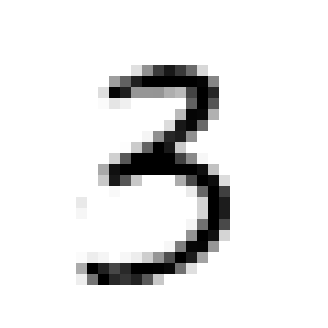

In [6]:
i = np.random.randint(1,len(x_test))
plt.figure(figsize=(4, 4))
plt.imshow(x_test[i],cmap='gray_r')
plt.axis("off")
pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
print(f"Etiqueta real: {y_test[i]}")
print(f"Etiqueta predecida: {np.argmax(pred)}")

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

In [ ]:
resnet = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet101v2",
)


In [ ]:
# URL para descargar las clases de ImageNet
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(url)
class_idx = response.json()

# Mostrar algunas de las clases
for i in range(10):  # Imprimir las primeras 10 clases
    print(class_idx[str(i)][1])  # El segundo elemento es el nombre de la clase


In [ ]:
images=["banjo","Doberman","cangrejo_cocotero","garter_snake","spiny_lobster"]

for imag in images:
    resnetv2 = tf.keras.applications.ResNet101V2(weights='imagenet')
    img_path = f'./datos/imagenes/{imag}.jpg'
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet_v2.preprocess_input(x)

    preds = resnetv2.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0])



## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

In [2]:
# Cargar el conjunto de datos Food101 desde TFDS
data, info = tfds.load('food101', split=["validation[:50%]", "validation[50%:]", "train"], with_info=True, as_supervised=True)

# Separar por train val y test
test_set_raw = data[0]  # test[:50%]
valid_set_raw = data[1]  # test[50%:]
train_set_original_raw = data[2]  # train

# Sacar las clases
class_names = info.features['label'].names

I0000 00:00:1739987012.713985   12888 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739987012.739729   12888 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739987012.739957   12888 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739987012.741610   12888 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

imagenes de entrenamiento


2025-02-19 18:43:35.898830: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


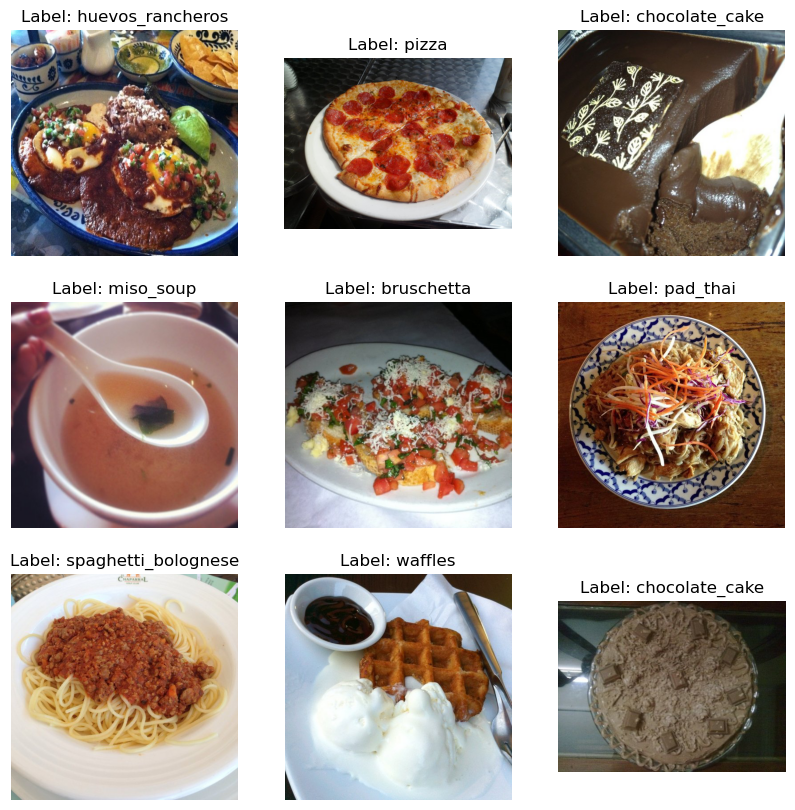

imagenes de validación


2025-02-19 18:43:36.284902: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


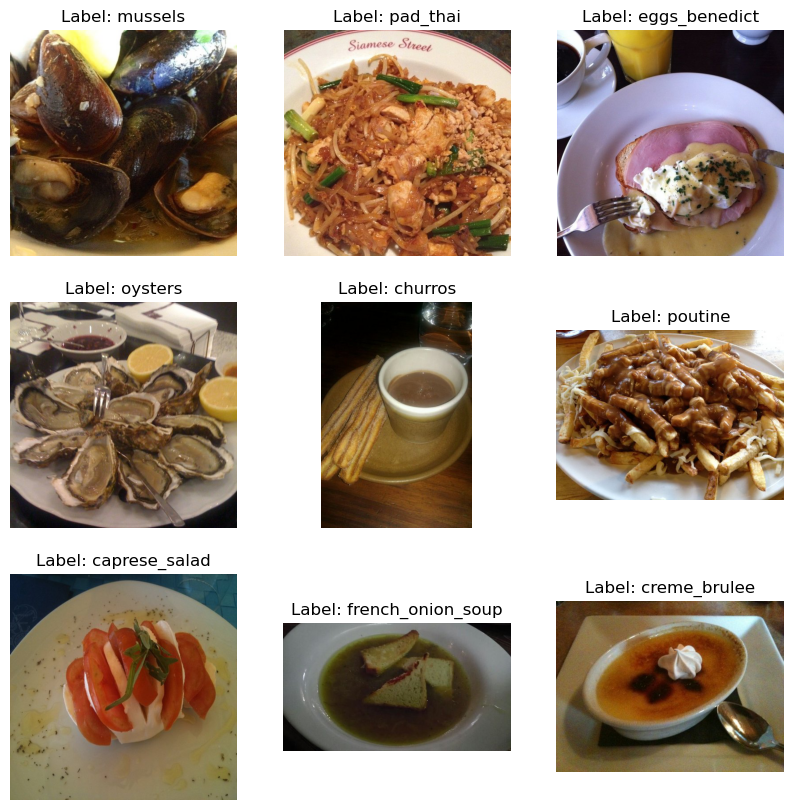

imagenes de prueba


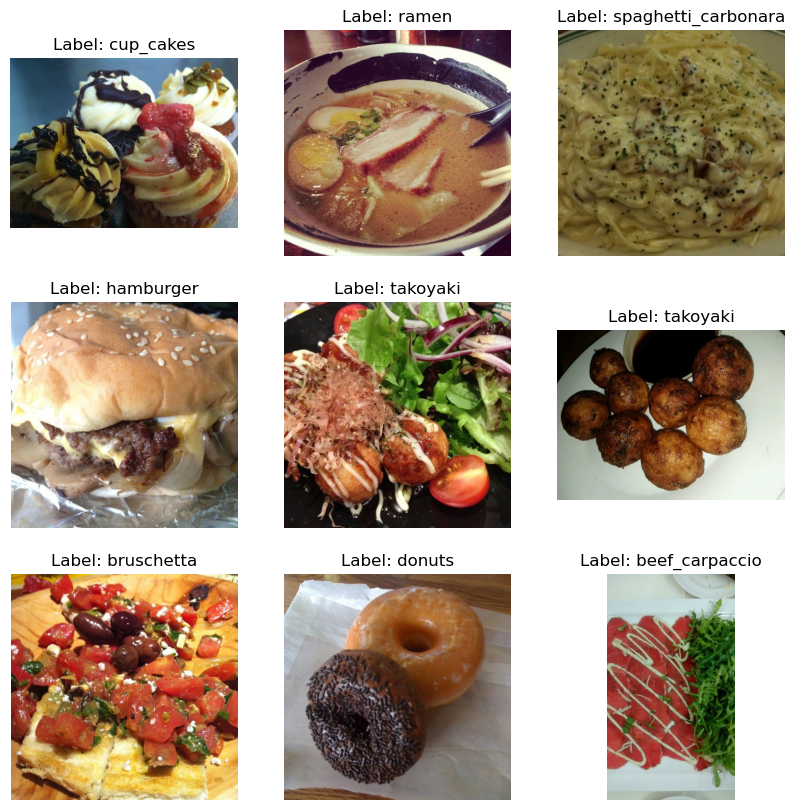

In [3]:
# Función para mostrar algunas imágenes
def plot_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {class_names[label.numpy()]}")
        plt.axis("off")
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
print("imagenes de entrenamiento")
plot_images(train_set_original_raw)

# Mostrar algunas imágenes del nuevo conjunto de validación
print("imagenes de validación")
plot_images(valid_set_raw)

# Mostrar algunas imágenes del nuevo conjunto de prueba
print("imagenes de prueba")
plot_images(test_set_raw)


In [4]:
# Tamaño de la imagen de entrada
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5

# Aumento de datos
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),   # Volteo horizontal aleatorio
    tf.keras.layers.RandomRotation(0.2),  # Rotación aleatoria (20% en cada dirección)
    tf.keras.layers.RandomZoom(0.2),  # Zoom aleatorio (20%)
    tf.keras.layers.RandomContrast(0.2),  # Contraste aleatorio
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)  # Desplazamientos aleatorios
])

def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

def preprocess_image(image, label):
    # Redimensionar la imagen a IMG_SIZE x IMG_SIZE
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Normalizar la imagen (entre -1 y 1)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

train_set_preprocessed = train_set_original_raw.map(preprocess_image)
train_set_augmented = train_set_original_raw.map(preprocess_image).map(augment_image)
train_set_full = train_set_preprocessed.concatenate(train_set_augmented)
train_set = train_set_full.batch(32)

valid_set_preprocessed = valid_set_raw.map(preprocess_image)
valid_set_augmented = valid_set_raw.map(preprocess_image).map(augment_image)
valid_set_full = valid_set_preprocessed.concatenate(valid_set_augmented)
valid_set = valid_set_full.batch(32)

test_set_preprocessed = test_set_raw.map(preprocess_image)
test_set_augmented = test_set_raw.map(preprocess_image).map(augment_image)
test_set = test_set_preprocessed.concatenate(test_set_augmented)

In [5]:
# Crear el modelo con MobileNetV2 congelado en la primera fase de entrenamiento
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Congelar las capas del modelo base (MobileNetV2) al principio
base_model.trainable = False

# Construir el modelo
model = tf.keras.Sequential([
    base_model,         # MobileNetV2 sin capas superiores
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')  # Número de clases para Food101
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con las capas congeladas (solo la última capa entrenará)
model.fit(train_set, epochs=EPOCHS, validation_data=valid_set)

Epoch 1/5


I0000 00:00:1739987043.202044   13077 service.cc:146] XLA service 0x7b1e60003580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739987043.202090   13077 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-19 18:44:03.254211: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-19 18:44:03.546483: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
2025-02-19 18:44:03.885039: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 16 bytes spill stores, 16 bytes spill loads

2025-02-19 18:44:04.212306: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memo

   9/4735 ━━━━━━━━━━━━━━━━━━━━ 1:16 16ms/step - accuracy: 0.0115 - loss: 5.0587    

I0000 00:00:1739987047.577918   13077 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4734/4735 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4144 - loss: 2.4811

2025-02-19 18:55:34.201576: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 368 bytes spill stores, 360 bytes spill loads

2025-02-19 18:55:34.247164: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 116 bytes spill stores, 116 bytes spill loads

2025-02-19 18:55:34.369485: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 144 bytes spill stores, 144 bytes spill loads

2025-02-19 18:55:34.439848: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 80 bytes spill stores, 80 bytes spill loads



4735/4735 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.4144 - loss: 2.4812

2025-02-19 18:57:32.936005: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 4 bytes spill stores, 4 bytes spill loads

2025-02-19 18:57:33.123590: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 188 bytes spill stores, 188 bytes spill loads

2025-02-19 18:57:33.357387: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 52 bytes spill stores, 52 bytes spill loads



4735/4735 ━━━━━━━━━━━━━━━━━━━━ 814s 171ms/step - accuracy: 0.4144 - loss: 2.4812 - val_accuracy: 0.3989 - val_loss: 2.4864
Epoch 2/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 805s 170ms/step - accuracy: 0.5318 - loss: 1.9030 - val_accuracy: 0.4198 - val_loss: 2.4157
Epoch 3/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 820s 173ms/step - accuracy: 0.5557 - loss: 1.7948 - val_accuracy: 0.4259 - val_loss: 2.4010
Epoch 4/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 786s 166ms/step - accuracy: 0.5702 - loss: 1.7340 - val_accuracy: 0.4263 - val_loss: 2.4036
Epoch 5/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 799s 169ms/step - accuracy: 0.5785 - loss: 1.6957 - val_accuracy: 0.4253 - val_loss: 2.4002


In [6]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# Descongelar las capas del bloque 10 al 16 más las 2 de salida nuestras para fine tunning
for layer in model.layers[-24:]:  # 22 + 2 capas de salida
    if not isinstance(layer, tf.keras.layers.BatchNormalization):  # Evitar problemas con BN
        layer.trainable = True

# Volver a compilar el modelo para aplicar los cambios
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Entrenar nuevamente con todas las capas entrenables
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 1105s 208ms/step - accuracy: 0.4485 - loss: 2.2615 - val_accuracy: 0.3585 - val_loss: 2.7640
Epoch 2/5
4272/4735 ━━━━━━━━━━━━━━━━━━━━ 1:19 171ms/step - accuracy: 0.6017 - loss: 1.5459

KeyboardInterrupt: 

In [ ]:
!ls

In [1]:
# Ruta de la imagen
img_path = 'datos/imagenes/tortilla.jpeg'

# Cargar la imagen
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen

# Convertir la imagen a un arreglo numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expande las dimensiones para que coincida con el formato (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar la imagen
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Mostrar la imagen para verificar
plt.imshow(img)
plt.axis('off')
plt.show()

# Hacer la predicción
predictions = model.predict(img_array)

# Obtener la clase con la mayor probabilidad
predicted_class = np.argmax(predictions, axis=1)

# Mapeo de índices a etiquetas
labels = info.features['label'].int2str

# Decodificar la clase en etiqueta
predicted_label = labels(predicted_class[0])

# Imprimir la clase predicha
print(f"Predicción de clase: {predicted_label}")

NameError: name 'tf' is not defined

La prediccion no es de lo más acertada....

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

In [ ]:

birds_dataset = tf.keras.utils.image_dataset_from_directory(
    "datos/datasets/CUB_200_2011/CUB_200_2011/images",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224), # Tamaño estandard de los modelos preentrenados
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False
)


In [ ]:
class_names = birds_dataset.class_names
print(f"Clases: {class_names}")

In [ ]:
# Dividir el conjunto
birds_length = len(birds_dataset)
train_length = int(0.7 * birds_length)
val_length = int(0.1 * birds_length)

birds_train = birds_dataset.take(train_length)
birds_val = birds_dataset.skip(train_length).take(val_length)
birds_test = birds_dataset.skip(train_length + val_length)

In [ ]:
for image_batch, labels_batch in birds_dataset.take(1):
    print(f"Dimensiones del batch de imágenes: {image_batch.shape}")
    print(f"Dimensiones del batch de etiquetas: {labels_batch.shape}")

    # Mostrar algunas imágenes
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
# Preprocesar las imágenes (redimensionar y normalizar)
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.efficientnet.preprocess_input(image)
    return image, label

# Definir el data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=17),
    tf.keras.layers.RandomRotation(factor=0.05, seed=17),
    tf.keras.layers.RandomContrast(factor=0.2, seed=17)
])

# Función para aplicar el data augmentation
def augment_images(image, label):
    image = data_augmentation(image, training=True)  # Aplica el aumento de datos en modo entrenamiento
    return image, label

In [ ]:
# Aplicar el preprocessing
birds_train = birds_train.map(preprocess_image)
birds_val = birds_val.map(preprocess_image)
birds_test = birds_test.map(preprocess_image)

# Aplicar el data augmentation a todos los conjuntos
birds_train = birds_train.map(augment_images)
birds_val = birds_val.map(augment_images)
birds_test = birds_test.map(augment_images)

In [ ]:
# Cargar EfficientNetB0 preentrenado
base_model = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar todas las capas del modelo base
base_model.trainable = False

# Crear el modelo con EfficientNetB0
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(200, activation='softmax')  # Número de clases en el dataset
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con las capas congeladas
model.fit(birds_train, epochs=5, validation_data=birds_val)


In [ ]:
base_model.summary()

In [ ]:
# Descongelar los bloques 6 y 7 y su activacion y las dos capas extra nuestras (69)
for layer in model.layers[-69:]:
    layer.trainable = True

# Volver a compilar el modelo para aplicar los cambios
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Entrenar nuevamente
model.fit(birds_train, epochs=5, validation_data=birds_val)

In [ ]:
# Cargar y preprocesar la imagen de prueba
image = tf.io.read_file("datos/imagenes/loro.jpg")
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, (224, 224))
plt.imshow(image.numpy().astype("uint8"))
plt.title("Parrot")
plt.axis("off")
image = tf.keras.applications.efficientnet.preprocess_input(image)

# Convertir la imagen a un lote (batch)
image = tf.expand_dims(image, axis=0)

# Hacer la predicción
predictions = model.predict(image)

# Obtener la clase predicha (índice con mayor probabilidad)
predicted_class = class_names[tf.argmax(predictions[0]).numpy()]
print(f"La clase predicha es: {predicted_class}")

In [ ]:
# Cargar y preprocesar la imagen de prueba
image = tf.io.read_file("datos/imagenes/cacatua.jpg")
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, (224, 224))
plt.imshow(image.numpy().astype("uint8"))
plt.title("cockatoo")
plt.axis("off")
image = tf.keras.applications.efficientnet.preprocess_input(image)

# Convertir la imagen a un lote (batch)
image = tf.expand_dims(image, axis=0)

# Hacer la predicción
predictions = model.predict(image)

# Obtener la clase predicha (índice con mayor probabilidad)
predicted_class = class_names[tf.argmax(predictions[0]).numpy()]
print(f"La clase predicha es: {predicted_class}")

In [ ]:
# Cargar y preprocesar la imagen de prueba
image = tf.io.read_file("datos/imagenes/cuervo.jpg")
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, (224, 224))
plt.imshow(image.numpy().astype("uint8"))
plt.title("Crow")
plt.axis("off")
image = tf.keras.applications.efficientnet.preprocess_input(image)

# Convertir la imagen a un lote (batch)
image = tf.expand_dims(image, axis=0)

# Hacer la predicción
predictions = model.predict(image)

# Obtener la clase predicha (índice con mayor probabilidad)
predicted_class = class_names[tf.argmax(predictions[0]).numpy()]
print(f"La clase predicha es: {predicted_class}")

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

In [ ]:

# Cargar modelos comprimidos de Tenserflow_Hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False



In [ ]:
# content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
content_path = "datos/imagenes/cuervo.jpg"
style_path = "datos/imagenes/gernika.jpg"

In [ ]:
# Carga las imagenes y les hace las transformaciones pertinentes.
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
# Funcion para mostrar iamgne
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [ ]:
# Despues de que el modelo haya convertido las imagenes a tensores y las haya fusioando con sus brujerias internas 
# convierte ese tensor resultante de vuelta en imagen.
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


In [ ]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


In [ ]:
# Función para cargar y preparar la imagen
def load_and_prepare_image(image_path, target_size=(256, 256)):
    # Cargar la imagen
    img = tf.keras.preprocessing.image.load_img(image_path)
    
    # Convertir la imagen a un tensor de NumPy
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Redimensionar la imagen
    img_resized = tf.image.resize(img_array, target_size)
    
    # Añadir una dimensión de batch al tensor de la imagen
    img_batch = np.expand_dims(img_resized, axis=0)
    
    # Normalizar la imagen a valores entre 0 y 1
    img_batch = img_batch / 255.0
    return img_batch

image_path = "datos/imagenes/cuervo.jpg" 
input_image = load_and_prepare_image(image_path)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

In [ ]:


# Definir un filtro personalizado (ejemplo: detector de bordes)
edge_filter = np.array([
    [[-1, -1, -1], [-1, -1, -1], [-1, 8, -1]],
    [[-1, -1, -1], [-1, -1, -1], [-1, 8, -1]],
    [[-1, -1, -1], [-1, -1, -1], [-1, 8, -1]]
], dtype=np.float32)
edge_filter = edge_filter.reshape((edge_filter.shape[0], edge_filter.shape[1], edge_filter.shape[2], 1))



Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

In [ ]:
# Creamos el modelo
modelo = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), use_bias=False, input_shape=(224, 224, 3))]
)

# Le ponemos el filtro a la capa
modelo.layers[0].set_weights([edge_filter])

resultado = modelo(input_image)

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(input_image[0])  # Mostrar la imagen original
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen Filtrada")
plt.imshow(resultado[0, :, :, 0])  # Mostrar la imagen filtrada
plt.axis("off")
plt.show()

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)

In [ ]:
# Filtro de desenfoque
blur_filter = np.array([
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
], dtype=np.float32)

blur_filter = blur_filter.reshape((blur_filter.shape[0], blur_filter.shape[1], blur_filter.shape[2], 1))
# Creamos el modelo
blur_model = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), use_bias=False, input_shape=(224, 224, 3))]
)

# Le ponemos el filtro a la capa
blur_model.layers[0].set_weights([blur_filter])

blurred_image = blur_model(input_image)

# Visualizar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(input_image[0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen con Desenfoque")
plt.imshow(blurred_image[0, :, :, 0])
plt.axis("off")
plt.show()

In [ ]:
# Definir los filtros
edge_filter = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)

blur_filter = np.array([
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
], dtype=np.float32)

sharpen_filter = np.array([
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
], dtype=np.float32)

# Añadir una dimensión extra para que tengan forma 4D
edge_filter = edge_filter.reshape((edge_filter.shape[0], edge_filter.shape[1], edge_filter.shape[2], 1))
blur_filter = blur_filter.reshape((blur_filter.shape[0], blur_filter.shape[1], blur_filter.shape[2], 1))
sharpen_filter = sharpen_filter.reshape((sharpen_filter.shape[0], sharpen_filter.shape[1], sharpen_filter.shape[2], 1))

# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), use_bias=False, input_shape=(224, 224, 3))
])

# Asignar los filtros a la capa de convolución
model.layers[0].set_weights([np.concatenate([edge_filter, blur_filter, sharpen_filter], axis=-1)])

# Obtener la salida del modelo
blurred_image = model(input_image)

# Visualizar las imágenes después de aplicar los filtros
plt.figure(figsize=(15, 10))

# Mostrar imagen original
plt.subplot(1, 4, 1)
plt.title("Imagen Original")
plt.imshow(input_image[0])
plt.axis("off")

# Mostrar imágenes de cada filtro
headers = ["Edge","Blur","Sharpen"]
for i in range(blurred_image.shape[-1]):
    plt.subplot(1, 4, i + 2)
    plt.title(f"Imagen con Filtro {headers[i]}")
    plt.imshow(blurred_image[0, :, :, i])
    plt.axis("off")

plt.show()


In [ ]:
# Definir los filtros para la primera capa
edge_filter = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)

blur_filter = np.array([
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
    [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
], dtype=np.float32)

sharpen_filter = np.array([
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
], dtype=np.float32)

# Añadir una dimensión extra para cada filtro de la primera capa
edge_filter = edge_filter.reshape((edge_filter.shape[0], edge_filter.shape[1], edge_filter.shape[2], 1))
blur_filter = blur_filter.reshape((blur_filter.shape[0], blur_filter.shape[1], blur_filter.shape[2], 1))
sharpen_filter = sharpen_filter.reshape((sharpen_filter.shape[0], sharpen_filter.shape[1], sharpen_filter.shape[2], 1))

# Definir un filtro adicional para la segunda capa (puede ser cualquier filtro)
additional_filter = np.array([
    [[0, 0, 0], [0, 0, 0], [0, -1, 0]],
    [[0, 0, 0], [0, 0, 0], [0, -1, 0]],
    [[0, 0, 0], [0, 0, 0], [0, -1, 0]]
], dtype=np.float32)

# Añadir una dimensión extra para el filtro adicional de la segunda capa
additional_filter = additional_filter.reshape((additional_filter.shape[0], additional_filter.shape[1], additional_filter.shape[2], 1))

# Crear el modelo con dos capas de convolución
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), use_bias=False, input_shape=(224, 224, 3)),  # Primera capa
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), use_bias=False)  # Segunda capa
])

# Asignar los filtros a la primera capa 
model.layers[0].set_weights([np.concatenate([edge_filter, blur_filter, sharpen_filter], axis=-1)])

# Asignar el filtro a la segunda capa 
model.layers[1].set_weights([additional_filter])

# Obtener la salida del modelo
final_image = model(input_image)

# Visualizar la imagen original y la imagen final
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(input_image[0])
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen Final (Después de Ambas Capas)")
plt.imshow(final_image[0, :, :, 0])
plt.axis("off")

plt.show()